In [ ]:
!pip install statsbombpy
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 800.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Sbopen
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, VerticalPitch
from mplsoccer import Sbopen
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import math
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
df_shot = pd.read_csv('/content/shot.csv')
df_shot.head()

,Unnamed: 0,id,match_id,x,y,play_pattern_name,sub_type_name,under_pressure,body_part_name,outcome_name
0,0,a2b83c3a-8d2f-4637-a217-b36d8a64b99e,69243,96.8,55.8,Regular Play,Open Play,1.0,Right Foot,Off T
1,1,c79cd4f3-386d-45c2-b56b-deca69a2d6c0,69243,91.8,40.1,From Counter,Open Play,1.0,Right Foot,Saved
2,2,99f67af2-ac68-4493-ab9f-c77087d5fa4c,69243,86.6,25.9,Regular Play,Open Play,NaN,Right Foot,Off T
3,3,049c9539-d04d-40d8-81a9-21a073d3c6ec,69243,112.2,32.5,From Throw In,Open Play,1.0,Head,Blocked
4,4,717d4a26-b525-451f-9072-bf84110c4644,69243,110.3,51.7,From Throw In,Open Play,1.0,Right Foot,Off T


In [ ]:
#Calculate distance
def calculate_distance(x, y):
  p = np.array([x, y])
  g = np.array([120, 40])
  dist = np.array(g) - np.array(p)
  return np.linalg.norm(dist)

In [ ]:
#Calculate angle
post_1 = [120, 36]
post_2 = [120, 44]

def calculate_angle(x, y):
  p = [x, y]
  v1 = np.array(post_1) - np.array(p)
  v2 = np.array(post_2) - np.array(p)
  angle = math.acos((v1 @ v2) / (np.linalg.norm(v1)*np.linalg.norm(v2)))
  return(abs(np.degrees(angle)))

In [ ]:
df_shot['angle'] = df_shot.apply(lambda row:calculate_angle(row['x'], row['y']), axis=1)
df_shot['distance'] = df_shot.apply(lambda row:calculate_distance(row['x'], row['y']), axis=1)

In [ ]:
def in_box(row):
    if row['x'] > 103.5 and row['y'] > 19.84 and row['y'] < 60.16:
        zone = True
    else:
        zone = False
    return zone

In [ ]:
df_shot['in_box'] = df_shot.apply(in_box, axis=1)

In [ ]:
shots_in_box = df_shot[df_shot['in_box'] == True]
shots_out_box = df_shot[df_shot['in_box'] == False]

In [ ]:
shots_in_box = shots_in_box.sum()
shots_out_box = shots_out_box.sum()

In [ ]:
goals = df_shot[df_shot['outcome_name'] == 'Goal']

In [ ]:
in_box = goals.in_box == True
out_box = goals.in_box == False

In [ ]:
in_box = in_box.sum()
out_box = out_box.sum()

In [ ]:
stats_box = pd.DataFrame({'Shots':['inside the box', 'outside the box'],
                          'No Goals':[shots_in_box, shots_out_box],
                          'Goals':[in_box, out_box]})

In [ ]:
stats_box

,Shots,No Goals,Goals
0,inside the box,Unnamed: 0 ...,1688
1,outside the box,Unnamed: 0 ...,267


In [ ]:
goals.head(2)

,Unnamed: 0,id,match_id,x,y,play_pattern_name,sub_type_name,under_pressure,body_part_name,outcome_name,angle,distance,in_box
23,23,42816089-4974-4634-bee2-8ff0f9fbdd93,69243,106.7,44.7,From Counter,Open Play,NaN,Right Foot,Goal,30.177330,14.106027,True
24,24,6ae2c9a5-659d-4982-8005-ff4c70975212,69243,111.7,40.0,Regular Play,Open Play,NaN,Left Foot,Goal,51.461411,8.300000,True


In [ ]:
goals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 23 to 16360
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1955 non-null   int64  
 1   id                 1955 non-null   object 
 2   match_id           1955 non-null   int64  
 3   x                  1955 non-null   float64
 4   y                  1955 non-null   float64
 5   play_pattern_name  1955 non-null   object 
 6   sub_type_name      1955 non-null   object 
 7   under_pressure     329 non-null    float64
 8   body_part_name     1955 non-null   object 
 9   outcome_name       1955 non-null   object 
 10  angle              1955 non-null   float64
 11  distance           1955 non-null   float64
 12  in_box             1955 non-null   bool   
dtypes: bool(1), float64(5), int64(2), object(5)
memory usage: 200.5+ KB


In [ ]:
goals.describe()

,Unnamed: 0,match_id,x,y,under_pressure,angle,distance
count,1955.000000,1.955000e+03,1955.000000,1955.000000,329.0,1955.000000,1955.000000
mean,7933.891560,1.675268e+06,109.513708,39.723632,1.0,39.035155,12.434832
std,4906.331876,1.815013e+06,5.704787,6.859210,0.0,23.207303,5.914742
min,23.000000,9.575000e+03,69.000000,19.300000,1.0,5.374694,0.400000
25%,3345.500000,7.022000e+04,106.200000,35.200000,1.0,22.643389,7.905061
50%,7845.000000,2.673680e+05,110.400000,39.800000,1.0,32.032227,11.745637
75%,12518.500000,3.825710e+06,113.700000,44.200000,1.0,49.708651,16.009208
max,16360.000000,3.825908e+06,120.000000,64.300000,1.0,180.000000,52.731016


In [ ]:
flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                  ['#e3aca7', '#c03a1d'], N=10)

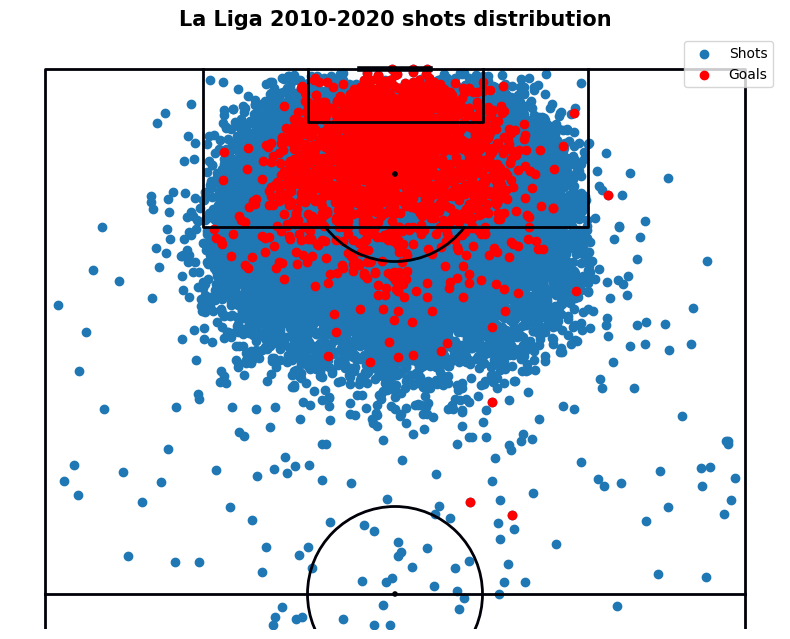

In [ ]:
pitch = VerticalPitch(half=True, line_color='#000009', line_zorder=2)
fig, ax = pitch.draw(figsize=(8,10))
sc1 = pitch.scatter(df_shot.x, df_shot.y, ax=ax)
sc2 = pitch.scatter(goals.x, goals.y, ax=ax, c='r')
ax.set_title('La Liga 2010-2020 shots distribution', fontsize = 15,
             fontweight = "bold")
ax.tick_params(labelsize = 7)
plt.legend([sc1, sc2], ['Shots', 'Goals'])
plt.show()

In [ ]:
goals.head()

,Unnamed: 0,id,match_id,x,y,play_pattern_name,sub_type_name,under_pressure,body_part_name,outcome_name,angle,distance,in_box
23,23,42816089-4974-4634-bee2-8ff0f9fbdd93,69243,106.7,44.7,From Counter,Open Play,NaN,Right Foot,Goal,30.177330,14.106027,True
24,24,6ae2c9a5-659d-4982-8005-ff4c70975212,69243,111.7,40.0,Regular Play,Open Play,NaN,Left Foot,Goal,51.461411,8.300000,True
28,28,e1c2fc2a-26dd-463a-9e43-b8e8f33a0c50,69243,105.0,36.5,From Free Kick,Open Play,1.0,Left Foot,Goal,28.474204,15.402922,True
32,32,943e1595-efe6-4b67-968c-4baea7f14c55,69241,118.5,44.5,From Free Kick,Open Play,1.0,Right Foot,Goal,61.557071,4.743416,True
36,36,ae65d946-0e5d-4540-a465-a2a51e6cdebd,69241,108.2,49.0,Regular Play,Open Play,1.0,Right Foot,Goal,24.806443,14.840485,True


In [ ]:
goals[goals['distance'] >= 30]

,Unnamed: 0,id,match_id,x,y,play_pattern_name,sub_type_name,under_pressure,body_part_name,outcome_name,angle,distance,in_box
772,772,1ffca530-0326-4795-b8f4-522695215c52,69221,69.0,53.4,Regular Play,Open Play,NaN,Left Foot,Goal,8.395239,52.731016,False
1211,1211,7a9bd53f-a58e-479e-9457-1916cde5a104,69286,90.0,33.2,Regular Play,Open Play,NaN,Right Foot,Goal,14.466717,30.761014,False
2134,2134,607646b4-ec84-4629-8728-e5ba6e71bf2b,69314,94.6,60.7,From Free Kick,Open Play,NaN,Right Foot,Goal,10.875380,32.766599,False
2310,2310,8898ffd5-7700-40dd-a028-2cf4b6347679,70281,87.1,40.3,Regular Play,Open Play,NaN,Right Foot,Goal,13.862935,32.901368,False
4509,4509,fa8b50e5-b0b9-4e29-9127-2f3b49692692,266142,88.7,45.9,Regular Play,Open Play,NaN,Right Foot,Goal,14.078091,31.851217,False
5909,5909,3a16cab8-02bb-41fa-8274-91a3cc018431,3825816,87.2,32.3,From Free Kick,Open Play,1.0,Right Foot,Goal,13.195653,33.691690,False
6928,6928,f6ec1f55-d46e-41e4-8183-72481b118077,3825736,70.5,48.6,Regular Play,Open Play,NaN,Left Foot,Goal,8.971888,50.241517,False
7150,7150,2268313b-140d-4644-89c6-cba4110a71bb,3825595,92.3,52.6,From Free Kick,Open Play,NaN,Right Foot,Goal,13.685364,30.431070,False
7191,7191,538c160b-a2df-44b3-a317-6291701bed8f,3825579,90.5,51.1,From Free Kick,Open Play,NaN,Right Foot,Goal,13.573834,31.519200,False
7226,7226,cd1d4802-f5d4-4f4a-921b-c2e01b73d564,3825572,86.5,37.1,From Throw In,Open Play,NaN,Left Foot,Goal,13.519138,33.625288,False


In [ ]:
goals['angle'].mean()

39.03515482316506

In [ ]:
goals = goals[goals['distance'] <= 30]

In [ ]:
flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                  ['#e3aca7', '#c03a1d'], N=10)

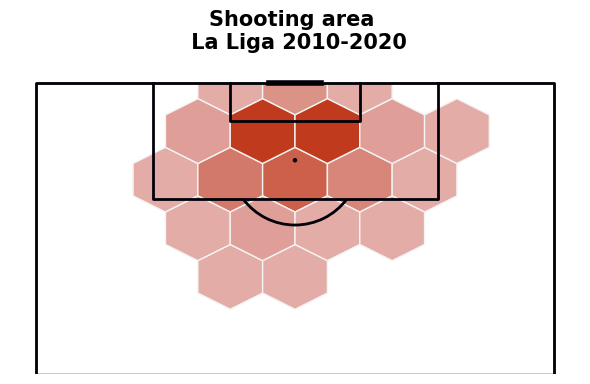

In [ ]:
pitch = VerticalPitch(half=True, line_color='#000009', line_zorder=2, pitch_color='white', pad_bottom=-15)
fig, ax = pitch.draw(figsize=(6, 8))
hexmap = pitch.hexbin(goals.x, goals.y, ax=ax, edgecolors='#f4f4f4',
                      gridsize=(8, 8), cmap=flamingo_cmap)
ax.set_title('Shooting area \n La Liga 2010-2020', fontsize = 15,
             fontweight = "bold")
ax.tick_params(labelsize = 7)
plt.show()

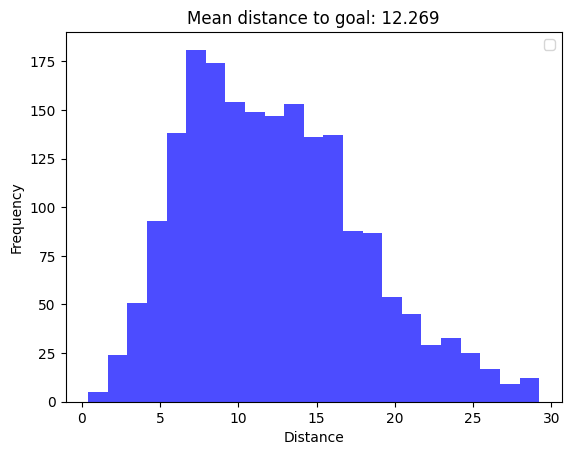

In [ ]:
fig, ax=plt.subplots()

plt.hist(goals['distance'], bins='auto', alpha=0.7, color='b')
plt.title(f'Mean distance to goal: {round(goals["distance"].mean(), 3)}')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

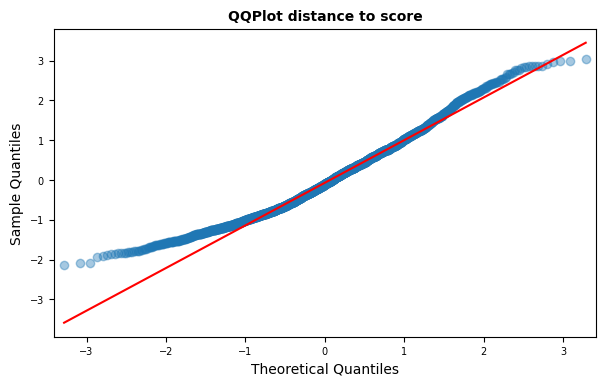

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    goals['distance'],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('QQPlot distance to score', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [ ]:
goals = goals[goals['distance'] <= 30]

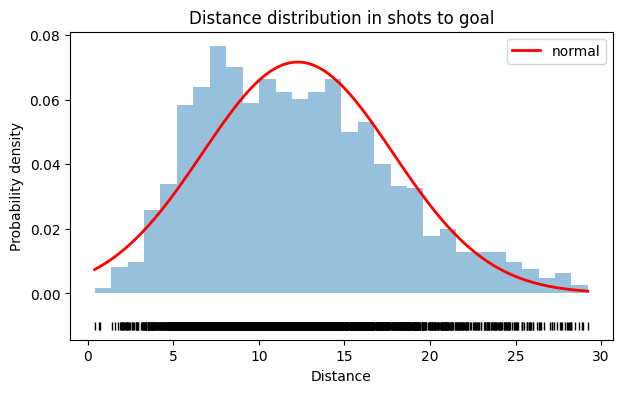

In [ ]:
mu, sigma = stats.norm.fit(goals['distance'])

x_hat = np.linspace(goals['distance'].min(), goals['distance'].max(), 100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, c='r', label='normal')
ax.hist(x=goals['distance'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(goals['distance'], np.full_like(goals['distance'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distance distribution in shots to goal')
ax.set_xlabel('Distance')
ax.set_ylabel('Probability density')
ax.legend();

In [ ]:
goals = goals[goals['angle'] <= 90]

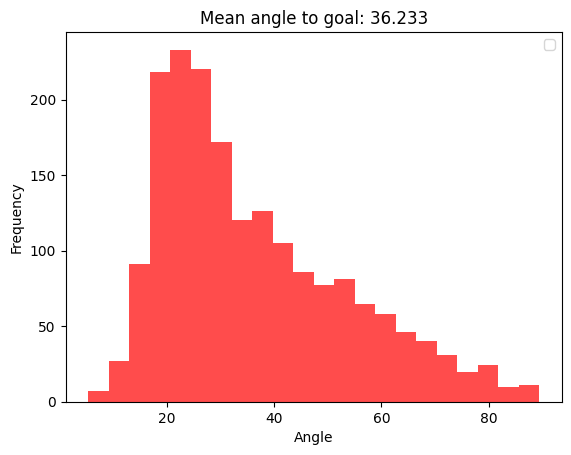

In [ ]:
fig, ax=plt.subplots()

plt.hist(goals['angle'], bins='auto', alpha=0.7, color='r')
plt.title(f'Mean angle to goal: {round(goals["angle"].mean(), 3)}')
plt.xlabel('Angle')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

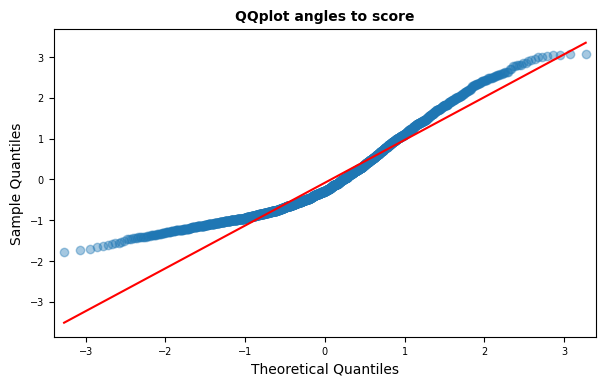

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    goals['angle'],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('QQplot angles to score', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

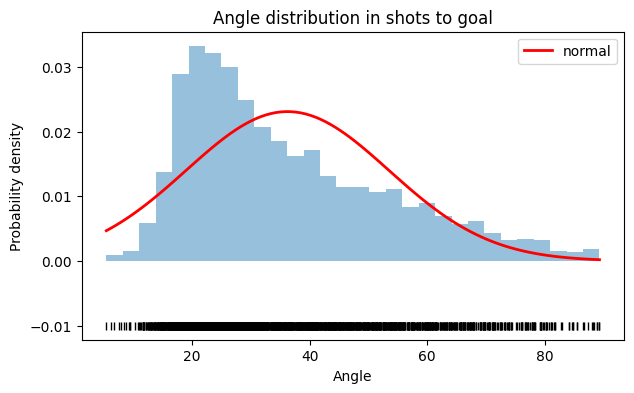

In [ ]:
mu, sigma = stats.norm.fit(goals['angle'])

x_hat = np.linspace(goals['angle'].min(), goals['angle'].max(), 100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, c='r', label='normal')
ax.hist(x=goals['angle'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(goals['angle'], np.full_like(goals['angle'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Angle distribution in shots to goal')
ax.set_xlabel('Angle')
ax.set_ylabel('Probability density')
ax.legend();

In [ ]:
df_event = pd.read_csv('/content/event.csv')
df_event.head()

,Unnamed: 0,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,sub_type_id,sub_type_name,body_part_id,body_part_name,x,y,outcome_id,outcome_name,counterpress,under_pressure,pass_switch,aerial_won,out,off_camera,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,technique_id,technique_name,shot_first_time,goalkeeper_position_id,goalkeeper_position_name,dribble_overrun,foul_won_defensive,pass_cross,pass_cut_back,dribble_nutmeg,ball_recovery_recovery_failure,foul_committed_card_id,foul_committed_card_name,pass_deflected,block_deflection,pass_goal_assist,foul_committed_advantage,foul_won_advantage,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,shot_one_on_one
0,0,7b301987-e8f1-42c7-80c0-ffe8f2e8eafb,1,1,00:00:00,0,0,1,0.0,303473,35,Starting XI,217,Barcelona,1,Regular Play,217,Barcelona,433.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,c8ab6406-f4b1-4882-86ee-d2a7076055eb,2,1,00:00:00,0,0,1,0.0,303473,35,Starting XI,217,Barcelona,1,Regular Play,213,Sevilla,433.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,c685923f-9075-4360-907a-f24378d5d7e1,3,1,00:00:00,0,0,1,0.0,303473,18,Half Start,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ab5254fd-3c8d-4727-b2c7-bf1d782d1bbd,4,1,00:00:00,0,0,1,0.0,303473,18,Half Start,217,Barcelona,1,Regular Play,213,Sevilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,037783f1-e24e-4aa6-85f2-a82500a4deea,1893,1,00:00:00,0,0,89,NaN,303473,42,Ball Receipt,217,Barcelona,3,From Free Kick,217,Barcelona,NaN,5246.0,Luis Alberto Suárez Díaz,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.2,40.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_event['team_name'].unique()

array(['Barcelona', 'Sevilla'], dtype=object)

In [ ]:
df_shot = df_event[df_event['type_name'] == 'Shot']

In [ ]:
df_shot = df_event[df_event['outcome_name'] == 'Goal']

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
df_shot.head()

,Unnamed: 0,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,sub_type_id,sub_type_name,body_part_id,body_part_name,x,y,outcome_id,outcome_name,counterpress,under_pressure,pass_switch,aerial_won,out,off_camera,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,technique_id,technique_name,shot_first_time,goalkeeper_position_id,goalkeeper_position_name,dribble_overrun,foul_won_defensive,pass_cross,pass_cut_back,dribble_nutmeg,ball_recovery_recovery_failure,foul_committed_card_id,foul_committed_card_name,pass_deflected,block_deflection,pass_goal_assist,foul_committed_advantage,foul_won_advantage,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,shot_one_on_one
1183,1183,bd4c447c-ecba-4396-884d-e1b38b2f0a9e,1183,1,00:26:36,26,36,55,0.538088,303473,16,Shot,217,Barcelona,7,From Goal Kick,217,Barcelona,NaN,5246.0,Luis Alberto Suárez Díaz,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,43.0,87.0,Open Play,38.0,Left Foot,112.2,41.4,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230348,0.4,4e6c7b2a-8b65-49f9-b36c-7a72a83cb5e3,94.0,Overhead Kick,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1377,1377,416622ee-e286-48ac-9535-7785624201c6,1377,1,00:31:13,31,13,60,0.565901,303473,16,Shot,217,Barcelona,1,Regular Play,217,Barcelona,NaN,8206.0,Arturo Erasmo Vidal Pardo,13.0,Right Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,120.0,37.6,87.0,Open Play,40.0,Right Foot,111.8,37.8,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.292280,0.6,886c5a67-e155-407e-8d1e-65b65c6e4f46,95.0,Volley,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,1433,7333040b-df64-491d-915f-f3953cab3923,1433,1,00:34:33,34,33,64,0.648648,303473,16,Shot,213,Sevilla,7,From Goal Kick,217,Barcelona,NaN,5477.0,Ousmane Dembélé,21.0,Left Wing,NaN,NaN,NaN,NaN,NaN,NaN,120.0,42.8,87.0,Open Play,40.0,Right Foot,110.0,29.5,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126757,0.2,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3215,3215,1d72f439-2ca0-4593-9138-8603ea42692f,3216,2,00:32:22,77,22,140,1.053205,303473,16,Shot,217,Barcelona,3,From Free Kick,217,Barcelona,NaN,5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,120.0,41.5,62.0,Free Kick,38.0,Left Foot,97.7,51.3,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071188,2.1,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
goals_byteam = df_shot.groupby(['team_name', 'outcome_name']).count()

In [ ]:
df_shot['team_name'].unique()

array(['Barcelona'], dtype=object)

In [ ]:
df_shot['player_name'].unique()

array(['Luis Alberto Suárez Díaz', 'Arturo Erasmo Vidal Pardo',
       'Ousmane Dembélé', 'Lionel Andrés Messi Cuccittini'], dtype=object)

In [ ]:
goals_byteam

,,Unnamed: 0,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,sub_type_id,sub_type_name,body_part_id,body_part_name,x,y,outcome_id,counterpress,under_pressure,pass_switch,aerial_won,out,off_camera,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,technique_id,technique_name,shot_first_time,goalkeeper_position_id,goalkeeper_position_name,dribble_overrun,foul_won_defensive,pass_cross,pass_cut_back,dribble_nutmeg,ball_recovery_recovery_failure,foul_committed_card_id,foul_committed_card_name,pass_deflected,block_deflection,pass_goal_assist,foul_committed_advantage,foul_won_advantage,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,shot_one_on_one
team_name,outcome_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Barcelona,Goal,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,4,4,2,4,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
